In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer

In [0]:
nltk.download('wordnet')

In [22]:
train_data = pd.read_csv("/content/drive/My Drive/documents/projects/DeCaf/data/train_data/combined.csv")
train_data.head()

,Unnamed: 0,text,label
0,0,control pattern according principle elsewhere ...,design
1,1,messenger throws error getting errors messenge...,general
2,2,error cannot find symbol variable trying integ...,design
3,3,data mapper pattern different repository patte...,design
4,4,start project using poetry start project using...,general


In [0]:
design_data_string = train_data[train_data.label == 'design'].text.str.cat(sep='\n')
general_data_string = train_data[train_data.label == 'general'].text.str.cat(sep='\n')

In [0]:
lemmitizer = WordNetLemmatizer()
design_data_string = " ".join([lemmitizer.lemmatize(word) for word in design_data_string.split(" ")])
general_data_string = " ".join([lemmitizer.lemmatize(word) for word in general_data_string.split(" ")])

In [0]:
def word_frequency(text):
  word_count = WordCloud(collocations=False).process_text(text)
  word_count = {key: value for key, value in sorted(word_count.items(), key=lambda item: item[1], reverse=True)}
  return word_count

In [0]:
design_words = word_frequency(design_data_string)
general_words = word_frequency(general_data_string)

In [92]:
print("Top design words: ", design_words)
print("Top general words: ", general_words)

Top design words:  {'class': 126273, 'pattern': 77943, 'object': 73296, 'method': 72796, 'code': 62079, 'need': 59711, 'will': 59147, 'using': 52634, 'want': 47785, 'design': 42248, 'data': 38762, 'example': 38722, 'type': 38074, 'interface': 36756, 'service': 33910, 'create': 32988, 'instance': 30502, 'problem': 29919, 'different': 29657, 'dependency': 28821, 'know': 28787, 'call': 28752, 'work': 27421, 'case': 27298, 'think': 26966, 'user': 26105, 'model': 24077, 'something': 23925, 'factory': 23812, 'answer': 22658, 'doe': 22119, 'time': 21946, 'used': 21755, 'implement': 21575, 'change': 21148, 'good': 21038, 'thank': 19888, 'function': 19677, 'look': 19636, 'thing': 19246, 'value': 19191, 'view': 19016, 'implementation': 18233, 'question': 18055, 'return': 17775, 'file': 17326, 'first': 17309, 'application': 17266, 'really': 16897, 'better': 16588, 'seem': 16464, 'property': 16452, 'approach': 15826, 'project': 15352, 'state': 15154, 'database': 15085, 'parameter': 15047, 'constru

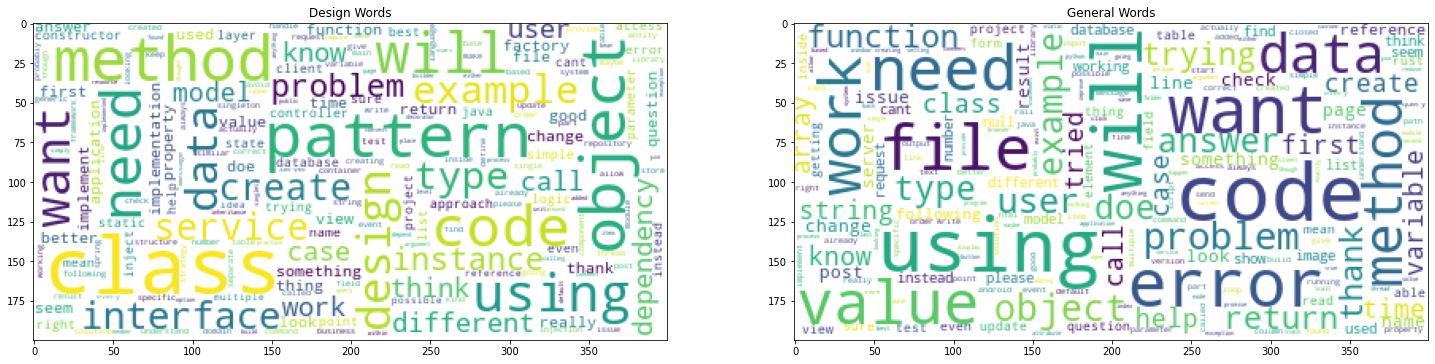

In [84]:
fig, (ax_design, ax_general) = plt.subplots(1, 2)
fig.set_figheight(12)
fig.set_figwidth(25)

design_word_cloud = WordCloud(max_font_size=50, background_color='white', collocations=False).generate(design_data_string)
general_word_cloud = WordCloud(max_font_size=50, background_color='white', collocations=False).generate(general_data_string)

ax_design.imshow(design_word_cloud)
ax_general.imshow(general_word_cloud)

ax_design.set_title("Design Words")
ax_general.set_title("General Words")

plt.show()

In [0]:
def top_words(corpus, n=None):
  vec = CountVectorizer().fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [0]:
top_design_words = top_words([design_data_string], 100)

In [61]:
print(top_design_words)

[('class', 126273), ('pattern', 77318), ('object', 72859), ('method', 72240), ('code', 62049), ('need', 59575), ('will', 59147), ('using', 52634), ('want', 47771), ('just', 45770), ('when', 42686), ('design', 42226), ('data', 38762), ('example', 38531), ('type', 37916), ('interface', 36514), ('service', 33706), ('instance', 30384), ('create', 30006), ('problem', 29721), ('different', 29657), ('dependency', 28821), ('know', 28767), ('call', 28627), ('work', 27151), ('case', 27119), ('think', 26962), ('user', 26033), ('model', 23991), ('something', 23925), ('factory', 23812), ('answer', 22484), ('doe', 22119), ('time', 21891), ('used', 21755), ('implement', 21529), ('good', 21038), ('change', 21020), ('function', 19567), ('look', 19177), ('value', 19052), ('thing', 19005), ('view', 18927), ('implementation', 18153), ('question', 17836), ('return', 17727), ('first', 17309), ('file', 17230), ('application', 17191), ('really', 16897), ('better', 16588), ('property', 16452), ('approach', 158

In [0]:
top_general_words = top_words([general_data_string], 100)

In [68]:
print(top_general_words)

[('code', 58634), ('using', 50574), ('when', 47538), ('will', 44705), ('want', 40287), ('error', 39975), ('file', 36077), ('need', 35336), ('value', 33891), ('work', 32552), ('just', 30248), ('method', 27389), ('data', 26997), ('problem', 26062), ('object', 24758), ('user', 23440), ('example', 21419), ('type', 21129), ('answer', 20466), ('doe', 20143), ('return', 19684), ('function', 19354), ('trying', 19131), ('string', 18947), ('class', 18492), ('time', 18192), ('know', 17988), ('array', 16875), ('help', 16787), ('variable', 16662), ('first', 16519), ('call', 16418), ('tried', 16032), ('create', 15876), ('case', 15519), ('something', 15131), ('change', 14436), ('result', 13992), ('check', 13963), ('line', 13888), ('issue', 13821), ('look', 13653), ('server', 13601), ('name', 13471), ('post', 13398), ('page', 13383), ('following', 13159), ('working', 12935), ('reference', 12915), ('used', 12788), ('please', 12787), ('list', 12730), ('thanks', 12456), ('different', 12383), ('null', 122